# K en yakın komşu

## en yakın komşular

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [53]:
from warnings import filterwarnings
filterwarnings("ignore")

In [54]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [55]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


# MODEL & TAHMİN

In [56]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)
knn_model

KNeighborsRegressor()

In [57]:
knn_model.n_neighbors

5

In [58]:
knn_model.metric

'minkowski'

In [59]:
y_pred = knn_model.predict(X_test)

In [60]:
np.sqrt(mean_squared_error(y_pred,y_test))

426.6570764525201

# MODEL TUNİNG

In [61]:
RMSE = []
for k in range(10):
    k =k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("k=",k," için RMSE değeri : ",rmse)


print(np.min(RMSE))




k= 1  için RMSE değeri :  455.03925390751965
k= 2  için RMSE değeri :  415.99629571490965
k= 3  için RMSE değeri :  420.6765370082348
k= 4  için RMSE değeri :  428.8564674588792
k= 5  için RMSE değeri :  426.6570764525201
k= 6  için RMSE değeri :  423.5071669008732
k= 7  için RMSE değeri :  414.9361222421057
k= 8  için RMSE değeri :  413.7094731463598
k= 9  için RMSE değeri :  417.84419990871265
k= 10  için RMSE değeri :  421.6252180741266
413.7094731463598


In [62]:
#GridSearchCV

In [63]:
knn_params = {"n_neighbors":np.arange(1,10,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [64]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [65]:
#final modeli 
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)

In [66]:
y_pred = knn_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

413.7094731463598

# DESTEK VEKTÖR REGRESYONU (SVL)

In [67]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


# MODEL & TAHMİN

In [68]:
svr_model = SVR(kernel="linear",epsilon=0.1).fit(X_train,y_train)

In [69]:
dir(svr_model)

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_num_iter',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_validate_data',
 '_validate_for_predict',
 '_valida

In [70]:
y_pred = svr_model.predict(X_train)
y_pred = svr_model.predict(X_test)

In [71]:
svr_model.intercept_

array([-80.15196063])

In [72]:
svr_model.coef_

array([[ -1.2183904 ,   6.09602978,  -3.67574533,   0.14217072,
          0.51435925,   1.28388992,  12.55922527,  -0.08693754,
          0.46597185,   2.98259931,   0.52944513,  -0.79820793,
         -0.16015531,   0.30872795,   0.28842348,  -1.79560066,
          6.41868986, -10.74313785,   1.33374319]])

In [73]:
#test
np.sqrt(mean_squared_error(y_test,y_pred))

370.0408415795005

# MODEL TUNİNG

In [74]:
svr_model = SVR(kernel="linear")

In [75]:
svr_params = {"C":[0.1,0.5,1,3]}

In [76]:
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=5,verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [77]:
svr_cv_model.best_params_

{'C': 0.5}

In [78]:
svr_tuned = SVR(kernel="linear",C=0.5).fit(X_train,y_train)
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

367.98747616655294

# YAPAY SİNİR AĞLARI

In [79]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


# MODEL & TAHMİN

# ön işleme yapılmak zorundandır

In [80]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [81]:
mlp_model = MLPRegressor().fit(X_train_scaled,y_train)

In [82]:
y_pred = mlp_model.predict(X_test_scaled)

In [83]:
np.sqrt(mean_squared_error(y_test,y_pred))

656.7235804092862

# MODEL TUNİNG

In [84]:
mlp_params = {"alpha":[0.1,0.01,0.02,0.001,0.0001],
 "hidden_layer_sizes":[(10,20),(5,5),(100,100)]}

In [85]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,verbose=2,n_jobs=-1,cv=10).fit(X_train_scaled,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [86]:
mlp_cv_model.best_params_

{'alpha': 0.02, 'hidden_layer_sizes': (100, 100)}

In [87]:
#final
mlp_tuned = MLPRegressor(alpha=0.01,hidden_layer_sizes=(100,100)).fit(X_train_scaled,y_train)

In [88]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [89]:
np.sqrt(mean_squared_error(y_test,y_pred))

358.3579790543064

# CART

# MODEL & TAHMİN

In [90]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [91]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [92]:
cart_model = DecisionTreeRegressor()

In [93]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor()

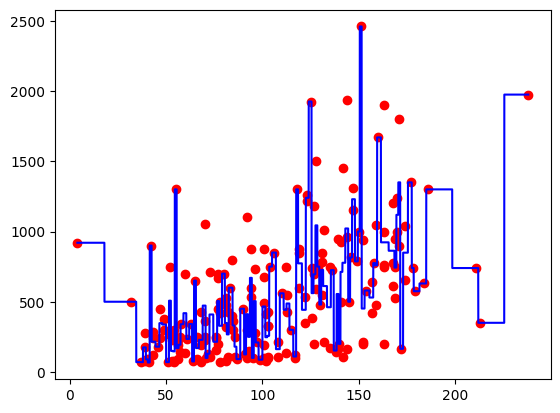

In [94]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X_train,y_train,color="red")
plt.plot(X_grid,cart_model.predict(X_grid),color="blue")


In [95]:
#tahmin
y_pred = cart_model.predict(X_test)

In [96]:
np.sqrt(mean_squared_error(y_test,y_pred))

468.49579052913884

In [97]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [98]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)

In [99]:
y_pred = cart_model.predict(X_test)

In [100]:
np.sqrt(mean_squared_error(y_test,y_pred))

516.0795297967576

# MODEL TUNİNG

In [101]:
cart_model

DecisionTreeRegressor()

In [104]:
cart_model = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

435.5080020622849

In [110]:
cart_params = {"max_depth":[2,3,4,5,10,20],
                "min_samples_split":[2,10,5,30,50,10]}
cart_model = DecisionTreeRegressor()
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [111]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [114]:
#final model 
cart_tuned_model = DecisionTreeRegressor(max_depth=4,min_samples_split=50).fit(X_train,y_train)
y_pred = cart_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

361.0876906511434

# RANDOM FOREST

### bagging

In [115]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


# Model & Tahmin

In [131]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [132]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

344.8191624908484

# Model Tuning

In [139]:
rf_params = {"max_depth":[8],
        "max_features":[2],
        "n_estimators":[200],
        "min_samples_split":[2]}

In [140]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [141]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [142]:
rf_model = RandomForestRegressor(random_state=42,max_depth=8,max_features=2,min_samples_split=2,n_estimators=200)
rf_tuned = rf_model.fit(X_train,y_train)

In [143]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

349.1649379391149

# Değişken önem düzeyi

# GRADIENT BOOSTING MACHINES

In [144]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


# Model  tahmin

In [150]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [151]:
y_pred = gbm_nodel.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

349.87983285948815

# Model tuning

In [154]:
gbm_params = {"learning_rate":[0.1],
              "max_depth":[3],
              "n_estimators":[200],
              "subsample":[1],
              "loss":["lad"]}

In [155]:
gmb_cv_model = GridSearchCV(gbm_model,gbm_params,cv=10,verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [157]:
gmb_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 1}

In [158]:
gmb_tuned = GradientBoostingRegressor(learning_rate=0.1,loss="lad",max_depth=3,n_estimators=300,subsample=1).fit(X_train,y_train)

In [159]:
y_pred = gmb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

335.97895253708975

# XG BOOST

In [160]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [161]:
import xgboost
from xgboost import XGBRegressor

In [162]:
xgb = XGBRegressor().fit(X_train,y_train)

In [163]:
y_pred = xgb.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

355.46515176059927

# model tuning

In [166]:
xgb_params = {"learning_rate":[0.5],
              "max_depth":[2],
              "n_estimators":[100],
              "colsample_bytree":[0.7]}

In [167]:
xgb_cv_model = GridSearchCV(xgb,xgb_params,cv=10,verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [168]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.5,
 'max_depth': 2,
 'n_estimators': 100}

In [169]:
xgb_tuned_model = XGBRegressor(colsample_bytree=0.7,learning_rate=0.5,max_depth=2,n_estimators=100).fit(X_train,y_train)

In [170]:
y_pred = xgb_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

333.77027174571015

# Light GBM

In [171]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [173]:
from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor().fit(X_train,y_train)

In [174]:
y_pred= lgb_model.predict(X_test)

In [175]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.8712087611089

# Model tuning

In [177]:
lgm_params = {"learning_rate":[0.7],
              "max_depth":[2],
              "n_estimators":[100]
              }

In [178]:
lgbm_cv_model = GridSearchCV(lgb_model,lgm_params,verbose=2,n_jobs=-1,cv=10).fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [179]:
lgbm_cv_model.best_params_

{'learning_rate': 0.7, 'max_depth': 2, 'n_estimators': 100}

In [180]:
lgb_tuned_model = LGBMRegressor(learning_rate=0.7,max_depth=2,n_estimators=100).fit(X_train,y_train)

In [182]:
y_pred = lgb_tuned_model.predict(X_test)

In [183]:
np.sqrt(mean_squared_error(y_test,y_pred))

380.31840329595826

# CAT BOOST

# model

In [184]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [185]:
from catboost import CatBoostRegressor

In [186]:
ct_model = CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 145ms	remaining: 2m 25s
1:	learn: 431.3923642	total: 147ms	remaining: 1m 13s
2:	learn: 424.8820360	total: 148ms	remaining: 49.3s
3:	learn: 418.2514904	total: 150ms	remaining: 37.4s
4:	learn: 412.6394021	total: 152ms	remaining: 30.2s
5:	learn: 406.6247020	total: 153ms	remaining: 25.4s
6:	learn: 400.5321206	total: 155ms	remaining: 22s
7:	learn: 394.6683437	total: 157ms	remaining: 19.4s
8:	learn: 388.2496484	total: 158ms	remaining: 17.4s
9:	learn: 382.9448842	total: 160ms	remaining: 15.9s
10:	learn: 377.2600080	total: 167ms	remaining: 15s
11:	learn: 372.4829606	total: 169ms	remaining: 13.9s
12:	learn: 366.6823437	total: 170ms	remaining: 12.9s
13:	learn: 362.6076230	total: 172ms	remaining: 12.1s
14:	learn: 358.0107745	total: 176ms	remaining: 11.5s
15:	learn: 353.2802665	total: 179ms	remaining: 11s
16:	learn: 348.5646265	total: 180ms	remaining: 10.4s
17:	learn: 343.6407912	total: 181ms	remaining: 9.89s
18:	learn: 339.2363847	total: 

In [187]:
y_pred = ct_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

351.194631344607

# Model tuning

In [190]:
catb_params = {"iterations":[500],
                "learning_rate":[0.1],
                "depth":[3]
                }

In [191]:
catb_model = CatBoostRegressor()

In [192]:
catb_cv_model = GridSearchCV(catb_model,catb_params,verbose=2,n_jobs=-1,cv=5).fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 425.7900818	total: 716us	remaining: 358ms
1:	learn: 404.8723520	total: 1.64ms	remaining: 410ms
2:	learn: 387.4057666	total: 2.18ms	remaining: 361ms
3:	learn: 372.2801584	total: 2.61ms	remaining: 324ms
4:	learn: 358.9204229	total: 3.04ms	remaining: 301ms
5:	learn: 347.0083933	total: 3.45ms	remaining: 284ms
6:	learn: 336.0130818	total: 3.88ms	remaining: 273ms
7:	learn: 324.3923300	total: 4.28ms	remaining: 263ms
8:	learn: 314.8690957	total: 4.69ms	remaining: 256ms
9:	learn: 308.5075563	total: 5.2ms	remaining: 255ms
10:	learn: 298.8587285	total: 5.6ms	remaining: 249ms
11:	learn: 294.7655438	total: 5.96ms	remaining: 242ms
12:	learn: 288.0697862	total: 6.43ms	remaining: 241ms
13:	learn: 282.6697154	total: 6.96ms	remaining: 242ms
14:	learn: 277.6121667	total: 7.45ms	remaining: 241ms
15:	learn: 273.4383979	total: 9.58ms	remaining: 290ms
16:	learn: 269.1556201	total: 10.5ms	remaining: 300ms
17:	learn: 264.8098704	total: 11ms	r

In [193]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.1}

In [194]:
catb_tuned_model = CatBoostRegressor(depth=3,learning_rate=0.1,iterations=500).fit(X_train,y_train)
y_pred = catb_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0:	learn: 425.7900818	total: 1.67ms	remaining: 834ms
1:	learn: 404.8723520	total: 3.06ms	remaining: 761ms
2:	learn: 387.4057666	total: 4.39ms	remaining: 727ms
3:	learn: 372.2801584	total: 5.29ms	remaining: 657ms
4:	learn: 358.9204229	total: 6.31ms	remaining: 625ms
5:	learn: 347.0083933	total: 7.08ms	remaining: 583ms
6:	learn: 336.0130818	total: 7.85ms	remaining: 553ms
7:	learn: 324.3923300	total: 8.67ms	remaining: 533ms
8:	learn: 314.8690957	total: 9.72ms	remaining: 531ms
9:	learn: 308.5075563	total: 10.7ms	remaining: 524ms
10:	learn: 298.8587285	total: 11.6ms	remaining: 516ms
11:	learn: 294.7655438	total: 13.9ms	remaining: 565ms
12:	learn: 288.0697862	total: 15.9ms	remaining: 597ms
13:	learn: 282.6697154	total: 16.7ms	remaining: 581ms
14:	learn: 277.6121667	total: 18ms	remaining: 583ms
15:	learn: 273.4383979	total: 19.2ms	remaining: 582ms
16:	learn: 269.1556201	total: 20.9ms	remaining: 592ms
17:	learn: 264.8098704	total: 21.9ms	remaining: 587ms
18:	learn: 261.6700768	total: 24.5ms	rem

336.40041748521486